In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/GenAI"

# Write a sample file to Google Drive
with open('/content/drive/My Drive/GenAI/sample.txt', 'w') as f:
  f.write('Hello, World!')

Mounted at /content/drive


In [4]:
from datasets import load_dataset
import pandas as pd
import numpy as np
# from textblob import TextBlob
import csv
import re
from tqdm import tqdm

In [5]:
review_dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
meta_dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", trust_remote_code=True)

print(review_dataset["full"][0])
print(type(review_dataset))


print(meta_dataset["full"][1])
print(type(meta_dataset))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

meta_All_Beauty.jsonl:   0%|          | 0.00/213M [00:00<?, ?B/s]

Generating full split:   0%|          | 0/112590 [00:00<?, ? examples/s]

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}
<class 'datasets.dataset_dict.DatasetDict'>
{'main_category': 'All Beauty', 'title': 'Yes to Tomatoes Detoxifying Charcoal Cleanser (Pack of 2) with Charcoal Powder, Tomato Fruit Extract, and Gingko Biloba Leaf Extract, 5 fl. oz.', 'average_rating': 4.5, 'rating_number': 3, 'features': [], 'description': [], 'price': 'None', 'images': {'hi_res': ['https://m.media-amazon.com/images/I/71g1lP0pMbL._SL1500_.jpg', 'https://m.media-amazon

In [22]:
def create_csv(dataset, cols, filename):
  file = pd.DataFrame(columns=cols)
  for col in cols:
    file[col] = [i[col] for i in dataset["full"]]
  file.to_csv(filename, index = False)


In [6]:
review_dataset_cols = ['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id', 'helpful_vote', 'verified_purchase']
meta_data_cols = ['title', 'parent_asin']

review_data_csv_filename = 'Amazon_All_Beauty_Reviews_2023.csv'
metadata_csv_filename = 'Amazon_All_Beauty_Meta_2023.csv'

In [24]:
create_csv(review_dataset, review_dataset_cols, review_data_csv_filename)
review_data = pd.read_csv(review_data_csv_filename)
# review_data = review_data[:20000]
review_data.head()

,rating,title,text,asin,parent_asin,user_id,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True
2,5.0,Yes!,"Smells good, feels great!",B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True
3,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True
4,5.0,A+,Love it,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True


In [25]:
create_csv(review_dataset, review_dataset_cols, metadata_csv_filename)
meta_data = pd.read_csv(metadata_csv_filename)
meta_data.head()

,rating,title,text,asin,parent_asin,user_id,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True
2,5.0,Yes!,"Smells good, feels great!",B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True
3,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True
4,5.0,A+,Love it,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True


In [48]:
import pandas as pd

# df = pd.read_json('data/All_Beauty.jsonl', lines=True)
# print(df.head())

review_data_csv_filename='Amazon_Reviews_2023.csv'
full_review_data = pd.read_csv(review_data_csv_filename)

In [51]:
print(full_review_data.shape)
review_data=full_review_data
# review_data = full_review_data[:30000]
review_data.head()

(2128605, 8)


,rating,title,text,asin,parent_asin,user_id,helpful_vote,verified_purchase
0,5.0,Work great,work great. use a new one every month,B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True
1,5.0,excellent product,Little on the thin side,B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,0,True
2,5.0,Happy customer!,"Quick delivery, fixed the issue!",B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,0,True
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...,B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,0,True
4,5.0,Dryer parts,Easy to install got the product expected to re...,B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,0,True


In [60]:
review_data.shape
print('reviews shape: ', review_data.shape)

total_beauty_products = review_data.groupby('asin').count()
# print('uniq beauty products shape:', total_beauty_products.shape)

users_review_count = review_data.groupby('user_id').size().reset_index(name='review_count').sort_values(by='review_count', ascending=False)
# print('total unique users: ', users_review_count)

# # Print the sorted DataFrame
# # print(sorted_user_counts.head())
print(users_review_count)
top_user = users_review_count.head(1)['user_id'].values[0]
top_user_data = review_data[review_data['user_id'] == top_user]
top_user_reviews = top_user_data['text']

# print(review_data.head(20))
# # print(metadata.head(20))
# print(top_user_reviews)

# filtered_reviews = review_data[review_data['user_id'] == 'AG375WAXLZ7PIOQKIQ6KQB4J3JVQ']
# print(filtered_reviews)

# print(top_user_reviews.values[0])
top_user_reviews_full = top_user_reviews.values
print(top_user_reviews_full[:5])

top_reviews = top_user_reviews_full[:10000]
print(top_user_reviews[:5])


reviews shape:  (2128605, 8)
                              user_id  review_count
1527889  AHJGIPM2BSL2PQIP2223Y2WVVAPQ           111
489359   AF5NXJDWHE77HSJ4LERATTFVS2LA            66
1544890  AHKNU4DNSSZYUFUOBEUBGLF7I7EA            66
1466999  AHEYN6GU45YH2SZCFXVVNWAPOJIQ            57
367954   AEUSUUHXIIA5R4Q3WJB53GKACOVQ            50
...                               ...           ...
632119   AFI2L7YGO45GV5XJJYNQ4KZF4S7Q             1
632118   AFI2L7Y5BIAJF6EM5234ZFI42DPQ             1
632117   AFI2L2BFVAMYSYGPMVFSUD4YGPKQ             1
632114   AFI2KWINYKOZWCTHYHWP723WKCWQ             1
632130   AFI2M2U7QITXI33FGEGRULQFSJVQ             1

[1755732 rows x 2 columns]
["Part does not fit as well as manufacturers OEM part. Narrower than the original nad I expect it will not work long. Save yourself the grief and use OEM Whirlpool parts, it's worth the few extra dollars to avoid the disappointment."
 'As an Appliance Professional I have replaced many ice door kits on Whirlpool refrig

In [61]:
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#cleanup review comments of punctuation and convert to lowercase, decode to ascii
def cleanup_review_msg(review_msg):
    review_msg = "".join(v for v in review_msg if v not in string.punctuation).lower()
    review_msg = review_msg.encode("utf8").decode("ascii",'ignore')
    return review_msg

corpus = [cleanup_review_msg(x) for x in top_user_reviews] #storing cleaned up reviews in corpus
# corpus[:10]



In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus) #creating a vocabulary (each unique word assigned a unique index) based on the frequency of words in the corpus
token_list = tokenizer.texts_to_sequences(['I have dry skin, unless I use moisturizers daily. I have been using this product a few times daily, just to keep my face moisturized. It feels good going on.'
 ])[0]
print(token_list)

[13, 19, 13, 191, 13, 19, 38, 380, 4, 123, 80, 5, 59, 23, 21, 20]


In [63]:
## convert data to sequence of tokens and generating n-gram sequence based token_list
def generate_ngram_seq_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1

    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = generate_ngram_seq_tokens(corpus)

inp_sequences[:10], total_words

([[6, 88],
  [6, 88, 11],
  [6, 88, 11, 68],
  [6, 88, 11, 68, 22],
  [6, 88, 11, 68, 22, 69],
  [6, 88, 11, 68, 22, 69, 22],
  [6, 88, 11, 68, 22, 69, 22, 120],
  [6, 88, 11, 68, 22, 69, 22, 120, 9],
  [6, 88, 11, 68, 22, 69, 22, 120, 9, 6],
  [6, 88, 11, 68, 22, 69, 22, 120, 9, 6, 187]],
 427)

In [64]:
import tensorflow.keras.utils as ku

#padding the sequences (0s added in the beginning), so that all sequences have same length
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)
predictors,label,len(label[0]),max_sequence_len

(array([[  0,   0,   0, ...,   0,   0,   6],
        [  0,   0,   0, ...,   0,   6,  88],
        [  0,   0,   0, ...,   6,  88,  11],
        ...,
        [  0,   0,   0, ..., 426, 124,  20],
        [  0,   0,   0, ..., 124,  20,  45],
        [  0,   0,   0, ...,  20,  45,  35]], dtype=int32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 427,
 75)

In [65]:
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, RepeatVector, TimeDistributed, Dense, Embedding, Reshape, Flatten, Dropout, Activation
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import RMSprop

In [69]:
def create_rnn_model(max_sequence_len, total_words):
    print(total_words)
    input_len = max_sequence_len - 1
    model = Sequential()
    model.add(Input(shape=(input_len, ), dtype='int32'))
    model.add(Embedding(total_words, 64, input_length=input_len))
    model.add(SimpleRNN(256))
    model.add(Dropout(0.1))
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

rnn_model = create_rnn_model(max_sequence_len, total_words)
rnn_model.summary()

427
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 74, 64)            27328     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 256)               82176     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 427)               109739    
                                                                 
Total params: 219243 (856.42 KB)
Trainable params: 219243 (856.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# print(max_sequence_len, total_words)
epochs=50
rnn_history=rnn_model.fit(predictors, label, batch_size = 128, epochs=epochs)
rnn_model.save('rnn_model.h5')

Epoch 1/50
10/10 [==============================] - 3s 157ms/step - loss: 5.9857
Epoch 2/50
10/10 [==============================] - 1s 143ms/step - loss: 5.5844
Epoch 3/50
10/10 [==============================] - 1s 136ms/step - loss: 5.4351
Epoch 4/50
10/10 [==============================] - 1s 134ms/step - loss: 5.4125
Epoch 5/50
10/10 [==============================] - 1s 134ms/step - loss: 5.3923
Epoch 6/50
10/10 [==============================] - 1s 141ms/step - loss: 5.3672
Epoch 7/50
10/10 [==============================] - 1s 134ms/step - loss: 5.3511
Epoch 8/50
10/10 [==============================] - 1s 134ms/step - loss: 5.3197
Epoch 9/50
10/10 [==============================] - 1s 134ms/step - loss: 5.2923
Epoch 10/50
10/10 [==============================] - 1s 135ms/step - loss: 5.2322
Epoch 11/50
10/10 [==============================] - 1s 128ms/step - loss: 5.1229
Epoch 12/50
10/10 [==============================] - 1s 134ms/step - loss: 5.0023
Epoch 13/50
10/10 [======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
rnn_model.save('/content/drive/My Drive/GenAI/rnn_model.h5')

In [95]:
import pickle;

rnn_history_data = rnn_history.history

# Save the history to a JSON file
with open('/content/drive/My Drive/GenAI/rnn_history.pkl', 'wb') as file:
    pickle.dump(rnn_history_data, file)

In [75]:
def rnn_evaluate(initial_text, num_words_to_generate, trained_model, max_seq_length):
    for _ in range(num_words_to_generate):
        input_tokens = tokenizer.texts_to_sequences([initial_text])[0]
        padded_tokens = pad_sequences([input_tokens], maxlen=max_seq_length-1, padding='pre')
        predicted_probabilities = trained_model.predict(padded_tokens, verbose=0)
        predicted_index = np.argmax(predicted_probabilities, axis=-1)

        next_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted_index:
                next_word = word
                break
        initial_text += " "+next_word
    return initial_text.title()

In [76]:
from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import random
import sys

top_user_reviews_join = ''.join(top_user_reviews)
vocabulary = sorted(list(set(top_user_reviews_join)))
char_to_indices = dict((c, i) for i, c in enumerate(vocabulary))
indices_to_char = dict((i, c) for i, c in enumerate(vocabulary))

max_length = 100
steps = 5
sentences = []
next_chars = []
for i in range(0, len(top_user_reviews_join) - max_length, steps):
	sentences.append(top_user_reviews_join[i: i + max_length])
	next_chars.append(top_user_reviews_join[i + max_length])

# Hot encoding each character into a boolean vector
X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = np.bool_)
y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_to_indices[char]] = 1
    y[i, char_to_indices[next_chars[i]]] = 1


In [77]:
def create_lstm_model(max_length, total_words):
    model = Sequential()
    model.add(LSTM(128, input_shape =(max_length, total_words)))
    model.add(Dense(total_words))
    model.add(Activation('softmax'))
    optimizer = RMSprop(learning_rate=0.01)
    model.compile(loss ='categorical_crossentropy', optimizer = optimizer)
    return model

lstm_model = create_lstm_model(max_length, len(vocabulary))
lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               101888    
                                                                 
 dense_6 (Dense)             (None, 70)                9030      
                                                                 
 activation (Activation)     (None, 70)                0         
                                                                 
Total params: 110918 (433.27 KB)
Trainable params: 110918 (433.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
def pred_prob_index(preds, temperature = 1.0):
	preds = np.asarray(preds).astype('float64')
	preds = np.log(preds) / temperature
	exp_preds = np.exp(preds)
	preds = exp_preds / np.sum(exp_preds)
	prob_dist = np.random.multinomial(1, preds, 1)
	return np.argmax(prob_dist)

# Helper function to generate text after the end of each epoch
def generate_text_epoch_end(epoch_no, logs):
	print('----- Generating product description after epoch: ', epoch_no+1)

	start_pos= random.randint(0, len(top_user_reviews_join) - max_length - 1)
	for diversity in [0.2, 0.5, 1.0, 1.2]:
		print('----- diversity:', diversity)

		generated_txt = ''
		sentence = top_user_reviews_join[start_pos: start_pos + max_length]
		generated_txt += sentence
		print('----- Generating product description with seed: "' + sentence + '"')
		sys.stdout.write(generated_txt)

		for i in range(400):
			x_pred = np.zeros((1, max_length, len(vocabulary)))
			for idx, char in enumerate(sentence):
				x_pred[0, idx, char_to_indices[char]] = 1.

			predictions = lstm_model.predict(x_pred, verbose = 0)[0]
			pred_index = pred_prob_index(predictions, diversity)
			pred_char = indices_to_char[pred_index]

			generated_txt += pred_char
			sentence = sentence[1:] + pred_char

			sys.stdout.write(pred_char)
			sys.stdout.flush()
		print()

print_callback = LambdaCallback(on_epoch_end = generate_text_epoch_end)

In [81]:
filepath = "/content/drive/My Drive/GenAI/lstm_model.h5.keras"
checkpoint = ModelCheckpoint(filepath, monitor ='loss', verbose = 1, save_best_only = True, mode ='min')
reduce_alpha = ReduceLROnPlateau(monitor ='loss', factor = 0.2, patience = 1, min_lr = 0.001)
callbacks = [print_callback, checkpoint, reduce_alpha]
lstm_history=lstm_model.fit(X, y, batch_size = 128, epochs = epochs, callbacks = callbacks)

Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 3.4968----- Generating product description after epoch:  0
----- diversity: 0.2
----- Generating product description with seed: " Samsung and LG washers. Lots of applications for Appliance Repair people.Brought old dryer back to "
 Samsung and LG washers. Lots of applications for Appliance Repair people.Brought old dryer back to         r             r       s           s              s              rs                s                   s   ss                           s           s   s      u       ss  s          p                      s  r      s       r        r         s                     g  s    r              r  r               s        r s        r              s          s       s s    s  rs    r   s     s      
----- diversity: 0.5
----- Generating product description with seed: " Samsung and LG washers. Lots of applications for Appliance Repair people.Brought old dryer back to "
 Samsung and LG washers. Lot

In [93]:
import pickle
lstm_model.save(filepath)
lstm_history_data = lstm_history.history
with open('/content/drive/My Drive/GenAI/lstm_history.pkl', 'wb') as file:
    pickle.dump(lstm_history_data, file)

<class 'dict'>


In [109]:
def lstm_evaluate(product, length, diversity):
    start_index = top_user_reviews_join.find(product)
    generated = ''
    sentence = top_user_reviews_join[start_index: start_index + max_length]
    generated += sentence
    for i in range(length):
            x_pred = np.zeros((1, max_length, len(vocabulary)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_to_indices[char]] = 1.

            preds = lstm_model.predict(x_pred, verbose = 0)[0]
            next_index = sample_index(preds, diversity)
            next_char = indices_to_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char
    return generated

In [119]:
product_1='Whirlpool Icemaker'
product_2='burner'

lstm_result_txt_1 = lstm_evaluate(product_1, 50, 0.2)
lstm_result_txt_2 = lstm_evaluate(product_2, 50, 0.2)
print(lstm_result_txt_1)
print(lstm_result_txt_2)

Whirlpool Icemaker, it is a generic replacement for a Whirlpool icemaker. I'm tired of purchasing it thes at greptice reat prices at and thes icemers 
burner. Easy to install.Great OEM part at great prices.Good quality parts at great prices.Great parts fan and thes ingersplianse iss ester replacement


In [118]:
print(lstm_evaluate('burner', 75, 0.2))

burner. Easy to install.Great OEM part at great prices.Good quality parts at great prices.Great parts fan and thes ices at and thes angesuss at great prices at an OEM parts at


In [120]:

#rnn_model testing

rnn_model = load_model('rnn_model.h5')
rnn_result_txt_1 = rnn_evaluate(product_1, 20, rnn_model, max_sequence_len)
rnn_result_txt_2 = rnn_evaluate(product_2, 20, rnn_model, max_sequence_len)
print(rnn_result_txt_1)
print(rnn_result_txt_2)

Whirlpool Icemaker A Great Price Good Great Prices Good Service Overall Great Deal For Doityourselfers Or Repair Professionals Looking To Save Money
Burner Generic Part Durability May Be Questionable Duet Washers Gotten On A While Slippage It Failed 7 Months Buyer Beware I


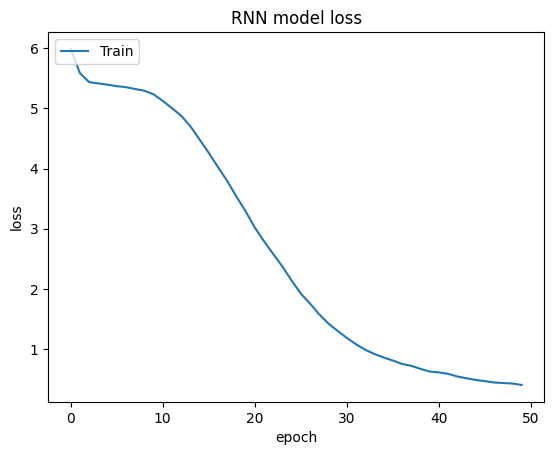

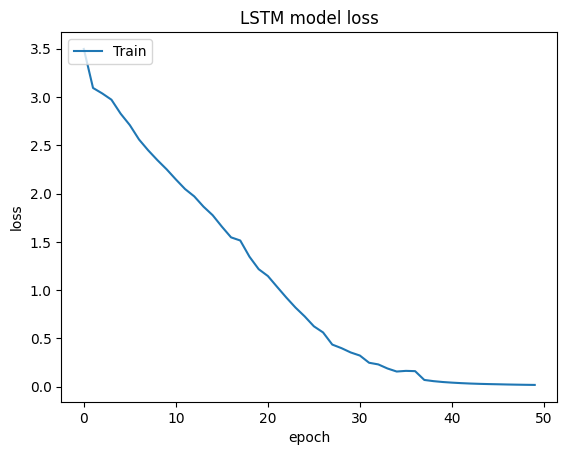

In [121]:
# print(lstm_history.history)

import matplotlib.pyplot as plt

def plot_loss(history, title):
  plt.plot(history['loss'])
  plt.title(title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

plot_loss(rnn_history.history, 'RNN model loss')
plot_loss(lstm_history.history, 'LSTM model loss')

In [2]:
# !pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00


In [14]:
from bert_score import score

expected_txt_1 = "The Whirlpool Icemaker is a reliable, affordable replacement for Whirlpool refrigerators. It comes with easy installation and solid performance. It is budget-friendly and a great choice."
expected_txt_2 = "The Burner is a durable, affordable replacement part with easy installation. It offers good value for quick fixes and ideal for short-term use."
rnn_P,rnn_R,rnn_F1 = score([rnn_result_txt_1, rnn_result_txt_2], [expected_txt_1, expected_txt_2], lang="en", verbose=True)




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 4.08 seconds, 0.49 sentences/sec


In [15]:
lstm_P,lstm_R,lstm_F1 = score([lstm_result_txt_1, lstm_result_txt_2], [expected_txt_1, expected_txt_2], lang="en", verbose=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.67 seconds, 1.20 sentences/sec


In [29]:
def print_bertscore(P, R ,F1, title):
  print(f"BERTScore for {title}: \n\tPrecision {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")

In [30]:
print_bertscore(rnn_P, rnn_R, rnn_F1, 'RNN')
print_bertscore(lstm_P, lstm_R, lstm_F1, 'LSTM')

BERTScore for RNN: 
	Precision 0.8166, Recall: 0.8561, F1: 0.8358
BERTScore for LSTM: 
	Precision 0.8524, Recall: 0.8780, F1: 0.8650


In [22]:
import matplotlib.pyplot as plt

def plot_bert_scores(P, R ,F1, title):
  plt.figure(figsize=(8, 6))

  # Plot Precision
  plt.plot(range(len(P)), P.numpy(), label='Precision', color='blue', marker='o')

  # Plot Recall
  plt.plot(range(len(R)), R.numpy(), label='Recall', color='green', marker='o')

  # Plot F1 Score
  plt.plot(range(len(F1)), F1.numpy(), label='F1-Score', color='red', marker='o')

  plt.xlabel('Sentence Index')
  plt.ylabel('Score')
  plt.title('Precision, Recall, and F1-Score using BERTScore - ' + title)
  plt.legend()
  plt.grid(True)

  # Show the plot
  plt.show()

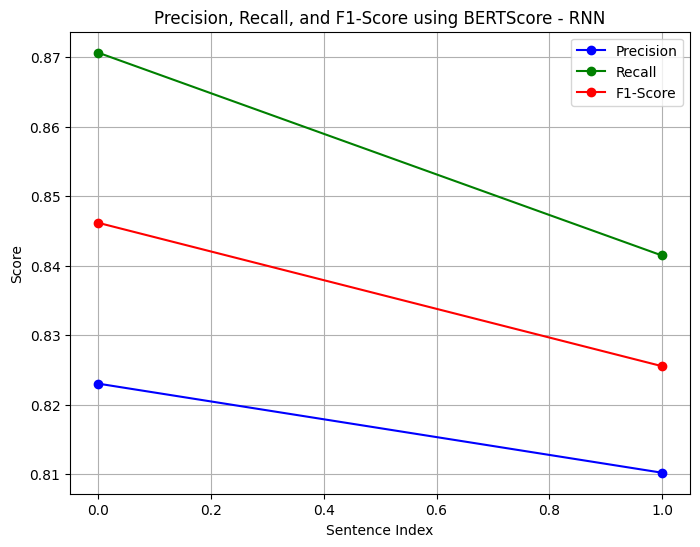

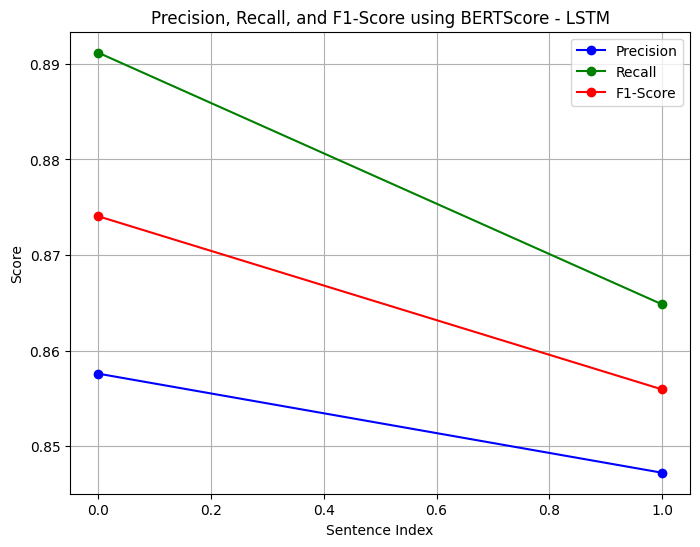

In [23]:
plot_bert_scores(rnn_P, rnn_R, rnn_F1, 'RNN')
plot_bert_scores(lstm_P, lstm_R, lstm_F1, 'LSTM')

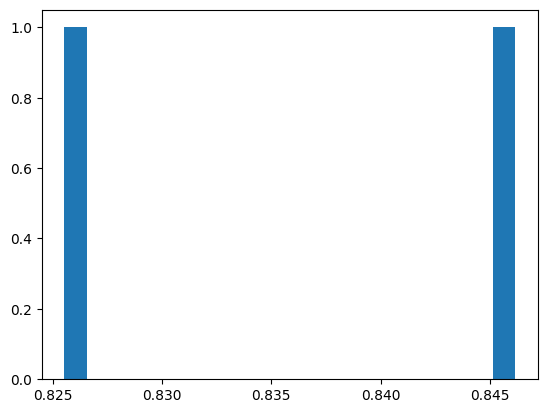

In [16]:
plt.hist(rnn_F1, bins=20)
plt.show()

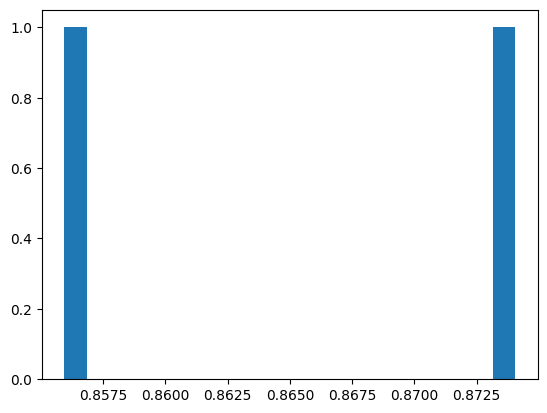

In [17]:
plt.hist(lstm_F1, bins=20)
plt.show()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


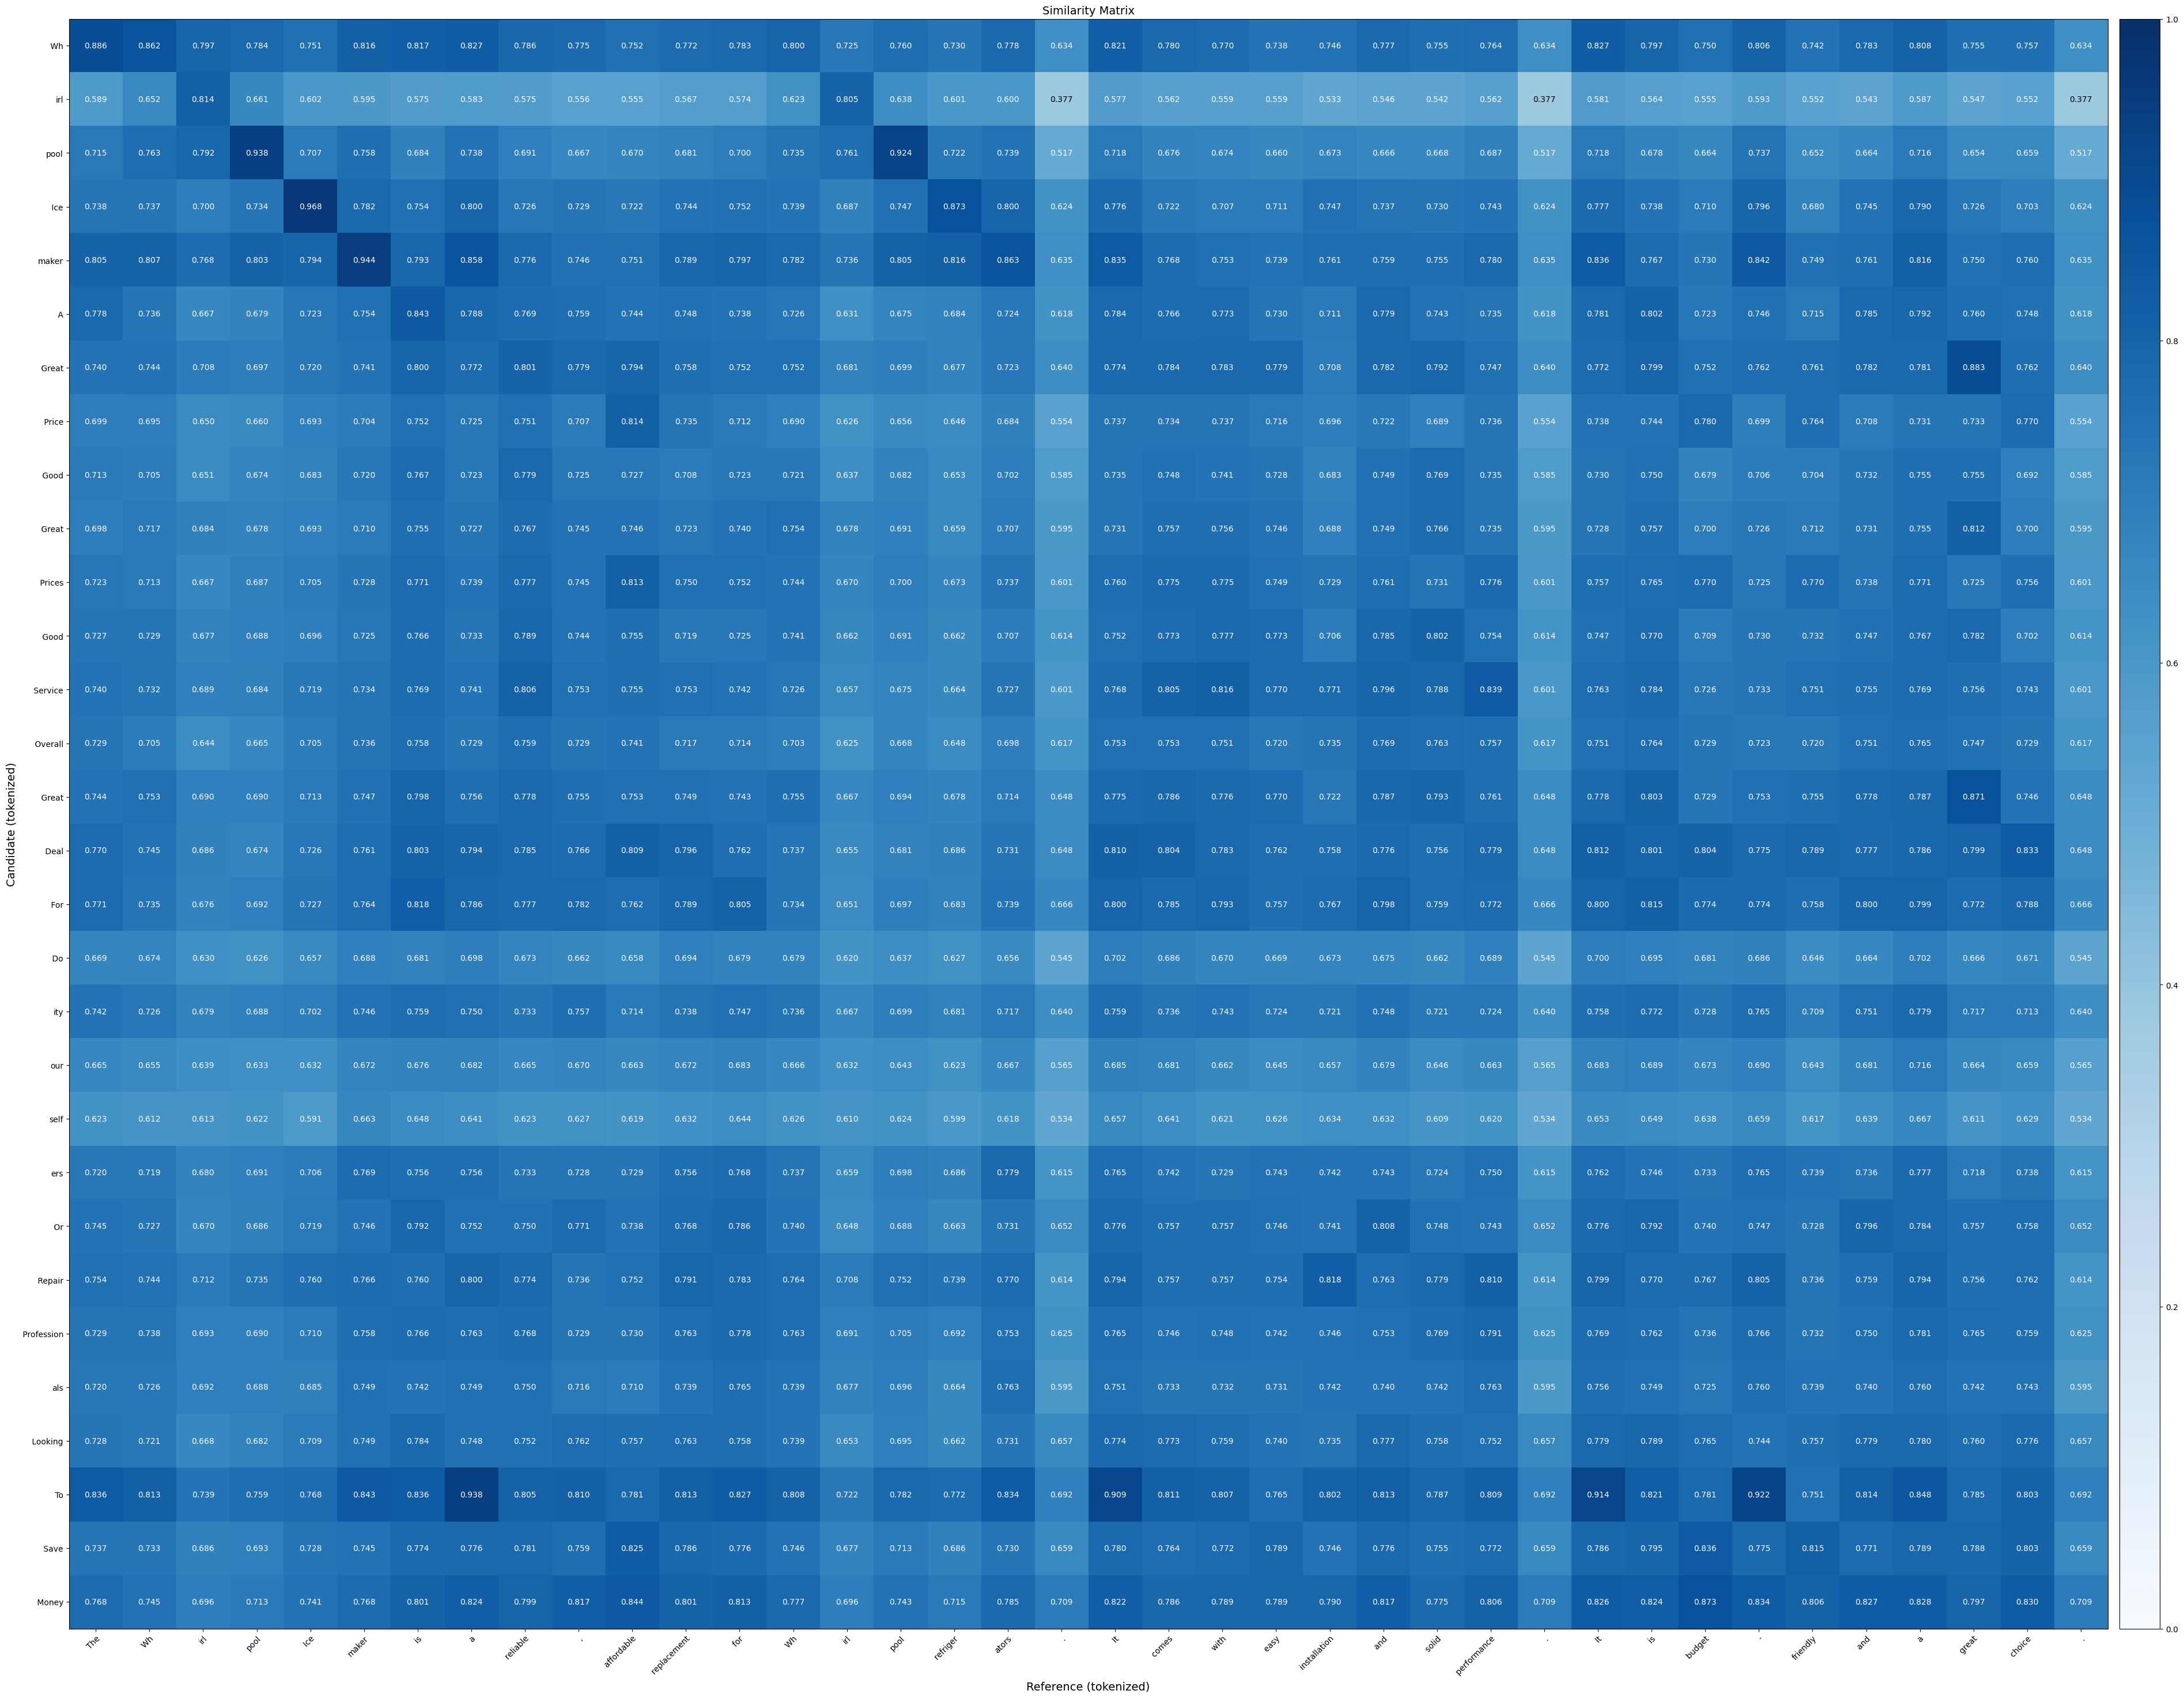

In [19]:
from bert_score import plot_example

plot_example(rnn_result_txt_1, expected_txt_1, lang="en")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


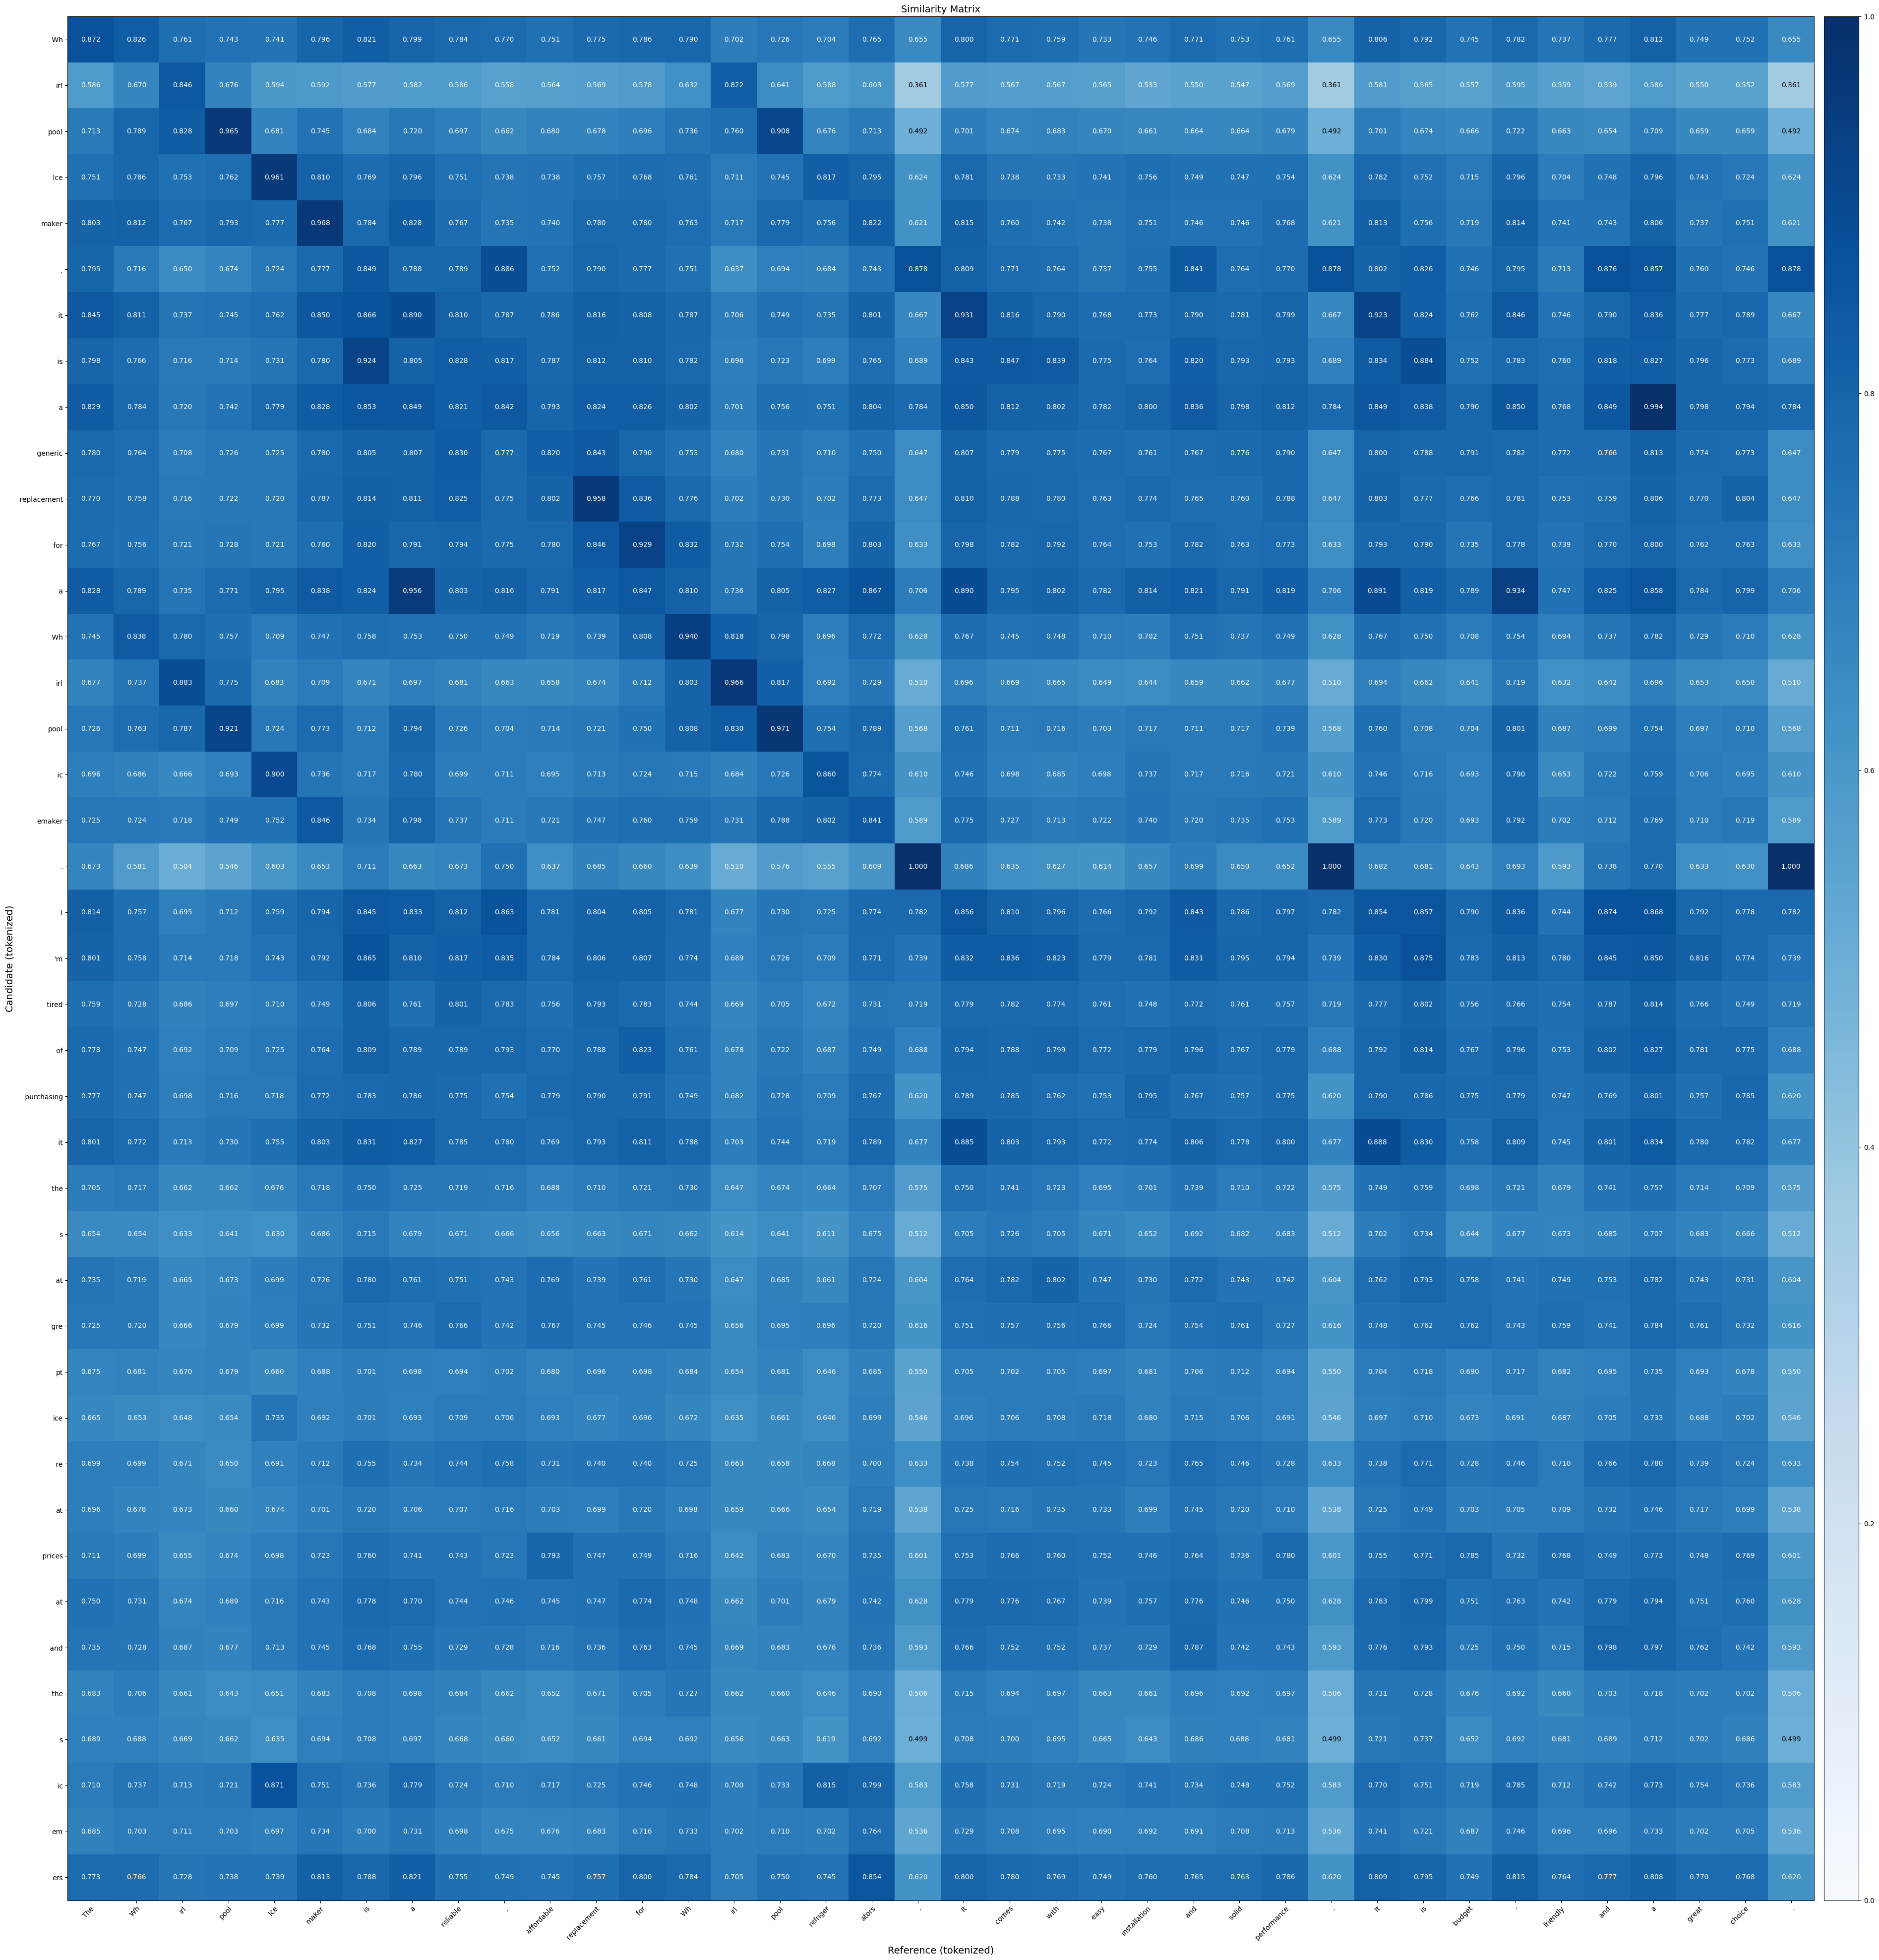

In [20]:
plot_example(lstm_result_txt_1, expected_txt_1, lang="en")